# Task 1

# Student's Percentage Prediction Model

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables. Data can be found at http://bit.ly/w-data

What will be predicted score if a student study for 9.25 hrs in a day?

### Importing Libraries

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

##### Reading the data

In [26]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully from URL")
data

Data imported successfully from URL


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There are no null values and hence data cleaning is not required

#### Plotting Study Hrs VS Percentage Score 

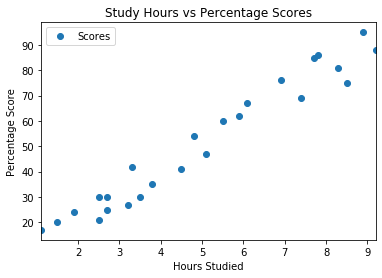

In [4]:
# Plotting the distribution of scores
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

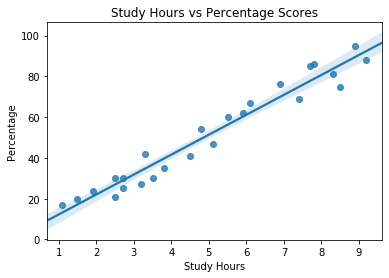

In [5]:
#plotting regressor plot to determine the relationship between feature and target
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Study Hours')
plt.ylabel('Percentage')
plt.show()

From the graph above, it can be clearly seen that there is a positive linear relation between the number of hours studied and percentage of score.

### Data Preparation

In [6]:
X = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #Labels

In [7]:
# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Training the Algorithm

In [8]:
y_train_new = y_train.reshape(-1,1)  
ones = np.ones([X_train.shape[0], 1]) # create a array containing only ones 
X_train_new = np.concatenate([ones, X_train],1) # concatenate the ones to X matrix

In [9]:
# creating the theta matrix
# notice small alpha value
alpha = 0.01
iters = 5000

theta = np.array([[1.0, 1.0]])
print(theta)

[[1. 1.]]


In [10]:
# Cost Function
def computeCost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [11]:
computeCost(X_train_new, y_train_new, theta)

1259.1955

The value of 1259.1955 is the initial value. The aim will be to minimise this to as small as possible

In [12]:
# Gradient Descent
def gradientDescent(X, y, theta, alpha, iters):
    m = len(X)
    for i in range(iters):
        theta = theta - (alpha/m) * np.sum(((X @ theta.T) - y) * X, axis=0)
        cost = computeCost(X, y, theta)
        #if i % 10 == 0:
            #print(cost)
    return (theta, cost)

In [13]:
g, cost = gradientDescent(X_train_new, y_train_new, theta, alpha, iters)  
print("Intercept -", g[0][0])
print("Coefficient- ", g[0][1])
print("The final cost obtained after optimisation - ", cost)

Intercept - 2.8268715728809677
Coefficient-  9.682081515927122
The final cost obtained after optimisation -  15.727417763727209


we have reduced the cost function from "1259.1955" to "15.727417763727209" .

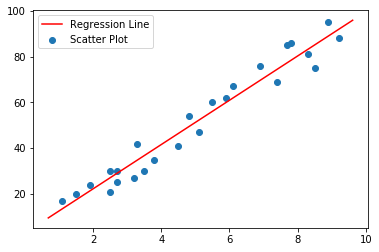

In [14]:
# Plotting scatter points
plt.scatter(X, y, label='Scatter Plot')
axes = plt.gca()

# Plotting the Line
x_vals = np.array(axes.get_xlim()) 
y_vals = g[0][0] + g[0][1]* x_vals #the line equation

plt.plot(x_vals, y_vals, color='red', label='Regression Line')
plt.legend()
plt.show()

### Using Scikit-Learn library

In [15]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [16]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.68207815]
Intercept -  2.826892353899737


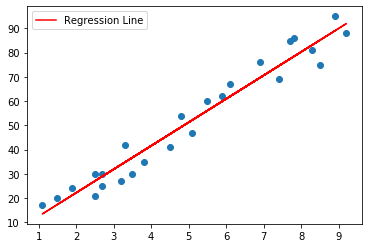

In [17]:

# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

### Making Predictions

In [18]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [19]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [20]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364416
Test Score: 0.9678055545167994


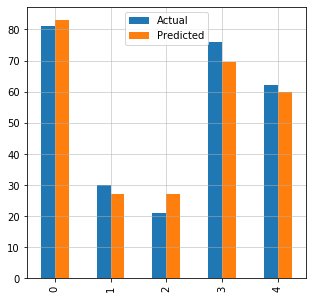

In [25]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(5,5))
plt.grid(which='major', linewidth='0.5')
plt.grid(which='minor', linewidth='0.5')
plt.show()

In [22]:

# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.38611528261494


### Evaluating the model

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994


R-squared value is 96.7% which is really good. This means that the algorithm has proven to be good for the given data